<a href="https://colab.research.google.com/github/shivanisharma543-ux/Regression-and-its-evaluation/blob/main/Regression_and_its_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
1.What is Simple Linear Regression?
      -Simple Linear Regression is one of the most basic and widely used statistical and machine-learning techniques.
      -It helps you model and predict the relationship between two variables.
      -Simple Linear Regression is a method to predict a continuous outcome (dependent variable Y) based on one input feature (independent variable X)
       by fitting the best-fit straight line through the data.
      -The model assumes that the relationship between X and Y is linear:
            Y=mX+c
            where:
            Y is the dependent variable (outcome)
            X is the independent variable (predictor)
            m is the slope
            c is the intercept

'''



In [ ]:
'''
2. What are the key assumptions of Simple Linear Regression?
      -There are five six assumptions of Simple Linear Regression:
      -Linearity: The relationship between X and the mean of Y is linear.
      -Homoscedasticity: The variance of residual is the same for any value of X.
      -Independence of Error: The residuals(errors) must be independent of each other.
      -Normality of errors: The residuals should follow a normal distribution, important mainly for hypothesis testing and confidence intervals.
      -Zero mean of errors: The mean of the residuals should be zero.
      -No multicollinearity: The independent variables should not be correlated with each other, they must vary.

'''

In [ ]:
'''
3. What is heteroscedasticity, and why is it important to address in regression models?
        -Heteroscedasticity is a condition in regression analysis where:
          The variance of the error terms (residuals) is not constant across all values of the independent variable(s).
          IN simple words the spread of errors changes as the value of X changes.
        -Heteroscedasticity is important to address because of the following reasons:
         1. When heteroscedasticity is present, OLS assumes constant variance but that assumption is violated.
            As a result, standard errors are wrongly estimated.
         2. Wrong standard errors lead to incorrect t-values and p-values.
            You may conclude a variable is significant when it is not (Type I error), or miss a truly significant variable (Type II error).
         3. Confidence intervals may be too narrow or too wide, giving false certainty or unnecessary doubt.
         4. Ordinary Least Squares (OLS) is no longer the Best Linear Unbiased Estimator.
            Estimates are less precise than they could be.
         5. Predictions at certain levels of the independent variable can be much less reliable due to changing error variance.
'''


In [ ]:
'''
4. What is Multiple Linear Regression?
    - Multiple Linear Regression (MLR) is a statistical technique.
      Used to model the relationship between one dependent variable and two or more independent variables.
    - Multiple Linear Regression expresses the dependent variable Y as a linear combination of several predictors:
        Y=β0​+β1​X1​+β2​X2​+⋯+βk​Xk​+ε where,
        Y = dependent (target) variable
        X1,X2,⋯,Xk = independent (predictor) variables
        β0,β1,⋯,βk = coefficients
        ε = error term
    - Key assumptions of MLR
      1. Linearity: The relationship between the dependent and independent variables is linear
      2. Independence of errors
      3. Normality of errors
      4. No multicollinearity
      5. No auto-correlation
      6. Homoscedasticity
''''



In [ ]:
'''
5. What is polynomial regression, and how does it differ from linear regression?
    - Polynomial regression is an extension of linear regression in which the relationship between the independent variable
      𝑋 and the dependent variable 𝑌is modeled as an n-degree polynomial.
    - Diffrence between polynomial regression and linear regression:
    Aspect	         Linear Regression	         Polynomial Regression
Relationship	         Straight-line	             Curved (non-linear)
Flexibility	             Low	                     Higher (captures curvature)
Model complexity	      Simple	                   More complex
Risk of overfitting	     Low	                     Higher (for high degree)
Use case	            Linear trends                Non-linear trends

'''



Slope (β1): 1.9800000000000004
Intercept (β0): 0.17999999999999794


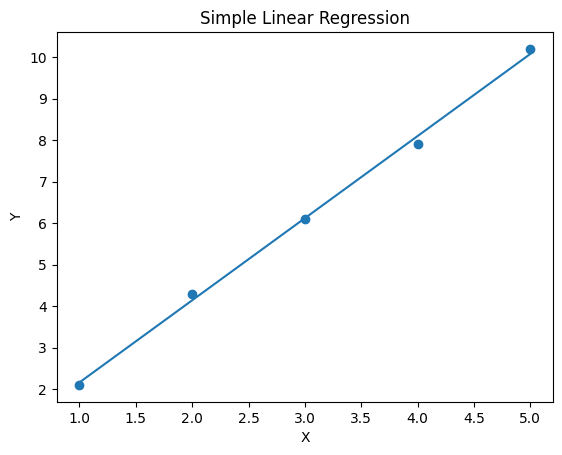

In [1]:
'''
6. Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.
'''
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Step 2: Define the data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])
# Step 3: Create and fit the Simple Linear Regression model
model = LinearRegression()
model.fit(X, Y)
# Step 4: Predict values using the model
Y_pred = model.predict(X)
# Step 5: Print model parameters
print("Slope (β1):", model.coef_[0])
print("Intercept (β0):", model.intercept_)
# Step 6: Plot data points and regression line
plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.show()


In [2]:
'''
7. Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.
'''
# Step 1: Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Step 2: Create dataset
data = {'Area': [1200, 1500, 1800, 2000],'Rooms': [2, 3, 3, 4],'Price': [250000, 300000, 320000, 370000]}
df = pd.DataFrame(data)
print(df)


   Area  Rooms   Price
0  1200      2  250000
1  1500      3  300000
2  1800      3  320000
3  2000      4  370000


In [3]:
# Step 3: Separate independent and dependent variables
X = df[['Area', 'Rooms']]
y = df['Price']
# Step 4: Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Intercept: 103157.89473684214
Coefficients:
Area: 63.15789473684211
Rooms: 34736.842105263146


In [5]:
# Step 5: Add constant for VIF calculation
X_with_const = sm.add_constant(X)
# Step 6: Calculate Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print(vif_data)


  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


In [ ]:
'''
 - Interpretation of VIF
VIF = 1 → No multicollinearity
VIF < 5 → Acceptable
VIF ≥ 10 → Serious multicollinearity
- Conclusion
Both Area and Rooms have VIF values well below 5, indicating no serious multicollinearity in the model.
'''

In [10]:
'''
8. Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.
'''
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Step 2: Create dataset
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])
# Step 3: Create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Step 4: Fit the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, Y)
# Step 5: Predict values
Y_pred = model.predict(X_poly)
# Step 6: Print model equation
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 0.06000000000000938
Coefficients: [0.   1.94 0.2 ]


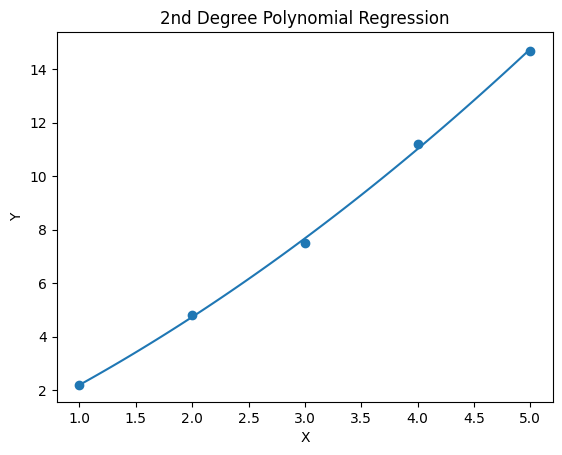

In [11]:
# Step 7: Plot the data points and polynomial curve
# Generate smooth curve for plotting
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
Y_smooth_pred = model.predict(X_smooth_poly)
# Plot
plt.scatter(X, Y)
plt.plot(X_smooth, Y_smooth_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd Degree Polynomial Regression")
plt.show()

In [ ]:
'''
Interpretation:
- The scatter points represent the actual data.
- The curved line represents the 2nd-degree polynomial fit.
- Polynomial regression captures the non-linear relationship between X and Y better than simple linear regression.
'''

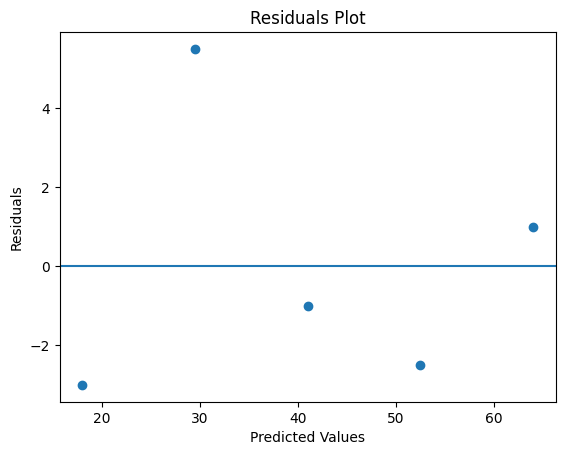

In [13]:
'''
9.  Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.
'''
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Step 2: Define the data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])
# Step 3: Fit the Simple Linear Regression model
model = LinearRegression()
model.fit(X, Y)
# Step 4: Predict Y values
Y_pred = model.predict(X)
# Step 5: Calculate residuals
residuals = Y - Y_pred
# Step 6: Create the residuals plot
plt.scatter(Y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

In [ ]:
'''
Interpretation for this data
  -If the residuals increase or decrease in spread as predicted values increase → heteroscedasticity is present
  -If the spread remains roughly constant → homoscedasticity
  Given the small dataset, conclusions should be indicative, not definitive, but a widening spread would suggest heteroscedasticity.
'''

In [ ]:
'''
10.Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression model.
Explain the steps you would take to address these issues and ensure a robust model.

    -As a data scientist in a real estate company, my goal is to build a reliable, interpretable, and robust house-price prediction model.
    -Detecting heteroscedasticity and multicollinearity means the model’s inferences and stability could be compromised.
    -I would address these issues systematically as follows:
    1. Diagnose the problems clearly
      -Detect heteroscedasticity
        Plot residuals vs. fitted values
        Run Breusch–Pagan or White test
        Look for funnel-shaped or uneven spread of residuals
      -Detect multicollinearity
        Calculate VIF
        Plot correlation matrix
        Identify predictors with VIF > 5 or 10
    2. Address heteroscedasticity
        a) Transform the target variable
          -Apply log, square root, or Box–Cox transformation to house prices, Example:
              log(Price)=β0​+β1​log(Area)+β2​Rooms+ε
          -This stabilizes variance common in real estate data
        b) Use robust standard errors
          -Apply heteroscedasticity-consistent (HC) standard errors
          -Keeps coefficient estimates the same but fixes inference (p-values, CIs)
        c) Weighted Least Squares (WLS)
          -Assign lower weights to observations with higher variance
          -Useful when variance pattern is predictable (e.g., luxury homes)
    3. Address multicollinearity
        a) Feature selection
          -Remove or combine highly correlated variables, Example:Replace area and built-up area with a single metric, Use price per sq. ft.
        b) Regularization techniques
          -Ridge Regression → reduces variance of coefficients
          -Lasso Regression → performs feature selection
          -Elastic Net → combines both
        c) Dimensionality reduction
          -Apply Principal Component Analysis (PCA) when interpretability is less critical
    4. Refit and validate the model
        a) Refit the regression after corrections
        b) Recheck: Residual plots, VIF values
        c) Use cross-validation to ensure generalization
        d) Compare metrics (R², RMSE, MAE) before and after corrections
    5. Business-focused validation
        -Test predictions across price segments (budget vs. luxury homes)
        -Ensure the model does not systematically over/under-predict high-value properties
        -Communicate assumptions and fixes clearly to stakeholders
'''
